In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [125]:
# Read the uploaded CSV file (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('booking_reviews copy.csv')

# Display the first few rows of the dataframe
df.head()

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [126]:
df = df.drop(['index', 'images', 'crawled_at', 'url', 'raw_review_text', 'tags', 'meta'], axis = 1)
df.head()

,review_title,reviewed_at,reviewed_by,hotel_name,hotel_url,avg_rating,nationality,rating,review_text
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...


In [127]:
rename_cols = {'review_title': 'Review Title', 'reviewed_at': 'Reviewed Date', 'reviewed_by': 'Reviewed By',
        'hotel_name': 'Hotel Name', 'hotel_url': 'Hotel URL', 'avg_rating': 'Avg Rating', 'nationality': 'Nationality',
        'rating': 'Rating', 'review_text': 'Review Text'}
df.rename(columns=rename_cols, inplace=True)

In [128]:
df.dtypes

Review Title      object
Reviewed Date     object
Reviewed By       object
Hotel Name        object
Hotel URL         object
Avg Rating       float64
Nationality       object
Rating           float64
Review Text       object
dtype: object

In [129]:
df.shape

(26675, 9)

In [130]:
duplicate_rows_df = df[df.duplicated()]
print("No Of Duplicate Rows:" , duplicate_rows_df.shape)

No Of Duplicate Rows: (16, 9)


In [131]:
df.count()

Review Title     26674
Reviewed Date    26570
Reviewed By      26570
Hotel Name       26386
Hotel URL        26386
Avg Rating       26386
Nationality      26370
Rating           26386
Review Text      26386
dtype: int64

In [132]:
df = df.drop_duplicates()
df.head()

,Review Title,Reviewed Date,Reviewed By,Hotel Name,Hotel URL,Avg Rating,Nationality,Rating,Review Text
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...


In [133]:
df.count()

Review Title     26658
Reviewed Date    26554
Reviewed By      26554
Hotel Name       26370
Hotel URL        26370
Avg Rating       26370
Nationality      26354
Rating           26370
Review Text      26370
dtype: int64

In [134]:
print(df.isnull().sum())

Review Title       1
Reviewed Date    105
Reviewed By      105
Hotel Name       289
Hotel URL        289
Avg Rating       289
Nationality      305
Rating           289
Review Text      289
dtype: int64


In [135]:
df=df.dropna()
df.count()

Review Title     26353
Reviewed Date    26353
Reviewed By      26353
Hotel Name       26353
Hotel URL        26353
Avg Rating       26353
Nationality      26353
Rating           26353
Review Text      26353
dtype: int64

In [136]:
print(df.isnull().sum())

Review Title     0
Reviewed Date    0
Reviewed By      0
Hotel Name       0
Hotel URL        0
Avg Rating       0
Nationality      0
Rating           0
Review Text      0
dtype: int64


<Axes: xlabel='Rating'>

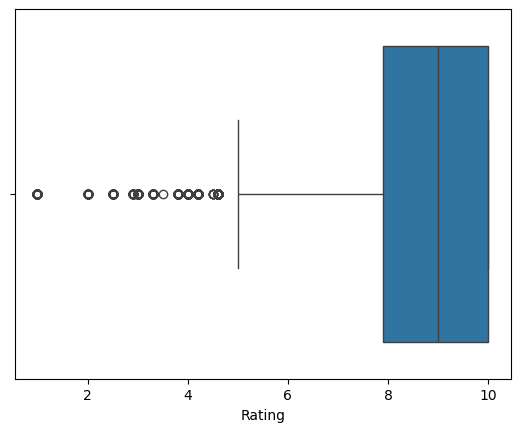

In [137]:
sns.boxplot(x=df["Rating"])

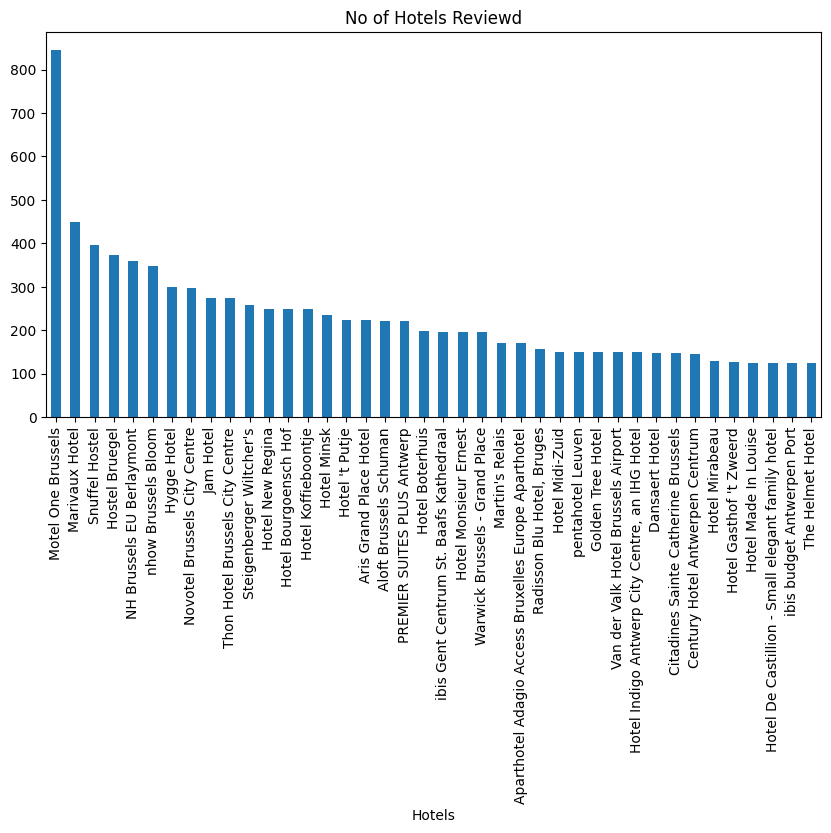

In [138]:
df['Hotel Name'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("No of Hotels Reviewd")
plt.xlabel('Hotels')
plt.show()

In [139]:
hotel_avg_rating = {}
for index, row in df.iterrows():
    hotel_avg_rating[row['Hotel Name']] = row['Avg Rating']

print(hotel_avg_rating)

{'Villa Pura Vida': 9.7, 'Hydro Palace Apartment': 9.2, 'Love Nest Versailles - Unique Louis XIV decoration - Calm location right IN city center': 8.8, 'Gite Namaste': 9.3, 'Hotel Saint Sauveur by WP Hotels': 7.8, 'B&B Hof Beygaert': 9.5, 'Novotel Gent Centrum': 8.4, 'B&B Place Jourdan': 9.1, 'Marivaux Hotel': 8.5, 'Hotel Astoria Gent': 8.5, 'AppartHotel Belle Vue': 7.9, 'Le Studio de Christine': 8.2, 'Guest house Heysel Laeken Atomium': 7.7, "la heid d'ehan": 8.1, 'Vintage Chalet in Sougne-Remouchamps near Forest': 9.2, 'Minimalistic In Premium Location': 9.2, 'Pegasus Studioflats Brussels City Aparthotel': 8.8, 'Liège Center Sakura': 8.9, 'Antwerp Harbour Hotel': 7.6, 'Cottage Moere': 9.4, 'Le Gîte Du Prieuré': 9.5, 'Villa Anna': 9.2, 'B&B The View Bis': 9.8, 'Hotel Au Prince Royal': 8.1, 'B&B Bij MoeMee': 9.5, 'B&B CHEZ PIERROT ALIAS IKEJIME': 7.8, 'B&B La maison de Fille': 9.3, 'Ter Zwaanhoek': 9.2, 'ibis Hotel Brussels Airport': 7.1, "Bed 'n Blues ****": 9.7, 'Complex Comfort': 9.

In [140]:
dict_hotels_avg_rating = {'Hotel Name': list(hotel_avg_rating.keys()),'Rating': list(hotel_avg_rating.values())}
df_hotels_avg_rating = pd.DataFrame.from_dict(dict_hotels_avg_rating)
df_hotels_avg_rating

,Hotel Name,Rating
0,Villa Pura Vida,9.7
1,Hydro Palace Apartment,9.2
2,Love Nest Versailles - Unique Louis XIV decora...,8.8
3,Gite Namaste,9.3
4,Hotel Saint Sauveur by WP Hotels,7.8
...,...,...
814,Smartflats City - Royal,7.6
815,Glamping op het Zeugekot,8.6
816,Hotel Bilderdijk,9.0
817,B&B Roosendaelhof,8.3


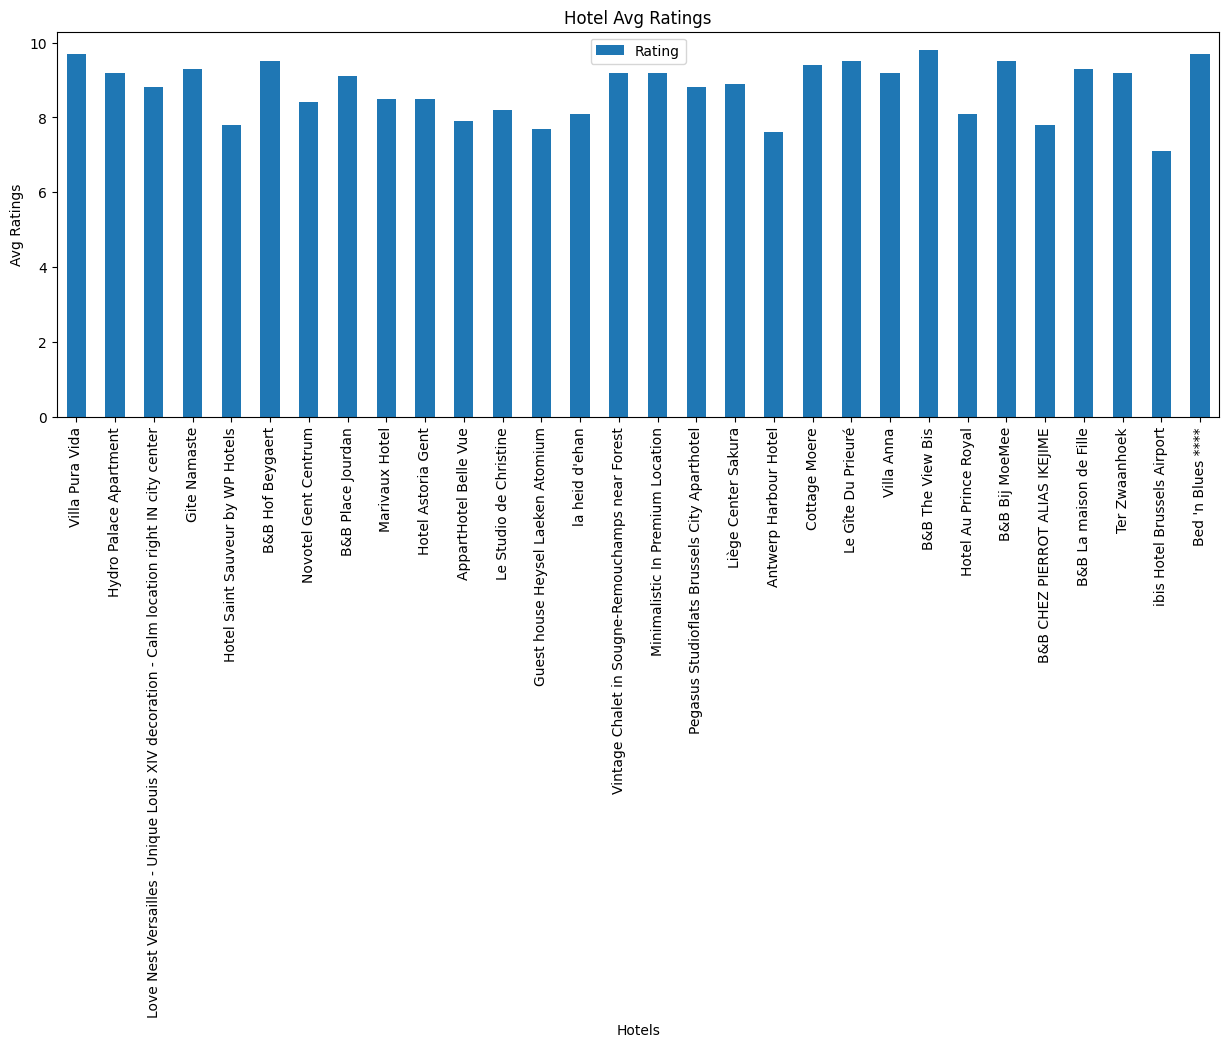

In [141]:
df_subset = df_hotels_avg_rating.head(30)
df_subset.plot(x='Hotel Name', y='Rating', kind='bar', figsize=(15, 5))
plt.title("Hotel Avg Ratings")
plt.xlabel('Hotels')
plt.ylabel('Avg Ratings')
plt.show()

In [142]:
df

,Review Title,Reviewed Date,Reviewed By,Hotel Name,Hotel URL,Avg Rating,Nationality,Rating,Review Text
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...
...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,7.7,Romania,8.8,"Had a room with the view to the main street, j..."
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything..."
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,9.0,Belgium,8.3,There are no comments available for this review


In [172]:
X = df.drop(['Review Title', 'Reviewed Date', 'Reviewed By', 'Hotel Name', 'Hotel URL', 'Nationality', 'Review Text'], axis = 1)
Y = df["Hotel Name"]

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [174]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)

In [176]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.12
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                                                                                          precision    recall  f1-score   support

                                                                        " Chimay B & B "       0.00      0.00      0.00         5
                                          "En Aqualye" chambre privative chez l'habitant       0.00      0.00      0.00         2
                                                                         "Ter Ename n°2"       0.00      0.00      0.00         1
                                                                 'S Hertogenmolens Hotel       0.00      0.00      0.00         5
                                                                              't Eenvoud       0.00      0.00      0.00         1
                                           

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [180]:
input_data = [[9, 10]]
prediction = knn_model.predict(input_data)
print(f"Predicted Hotel: {prediction[0]}")

Predicted Hotel: Hotel Bon Accueil


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
